In [1]:
import pandas as pd


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# ML

In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df_final_clean = pd.read_excel("df_final_clean.xlsx")
df_final_clean_encoded = df_final_clean.copy()

# ‚úÖ 3. ‡πÅ‡∏õ‡∏•‡∏á categorical ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
for col in df_final_clean_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_final_clean_encoded[col] = le.fit_transform(df_final_clean_encoded[col]).astype(int)

df_final_clean_encoded = df_final_clean_encoded.drop(columns=['date'])
df_final_clean_encoded

cases  temp_15d_avg  rain_15d_avg  humid_15d_avg  ‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)  ‡πÄ‡∏û‡∏®  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  \
0         1     22.745000      0.000000      74.794444      34.0    0      0   
1         1     27.170000      2.386667      74.827333      13.0    0     10   
2         1     27.786667      2.520000      73.410667      51.0    1      0   
3         1     27.970000      4.253333      73.302667      14.0    1     10   
4         2     28.501333      4.233333      73.984667      58.0    0      9   
...     ...           ...           ...            ...       ...  ...    ...   
1045      2     22.858571      2.071429      82.036429      20.5    1      6   
1046      2     22.716667      1.933333      81.784000      56.0    0      7   
1047      1     21.687333      1.933333      82.676000      11.0    1     10   
1048      1     21.304667      1.933333      82.992667      41.0    1      7   
1049      1     21.056000      1.933333      82.984667      31.0    1      7   

      ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  ‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•  
0        8      1      2  2017       1       2  
1       60      8      4  2017       2       1  
2       60      8      5  2017       2       1  
3       60      8      5  2017       2       1  
4       60      8      5  2017       2       1  
...    ...    ...    ...   ...     ...     ...  
1045     3      2     12  2024       4       2  
1046    31      2     12  2024       4       2  
1047    15      2     12  2024       4       2  
1048    35      6     12  2024       4       2  
1049    15      2     12  2024       4       2  

[1050 rows x 13 columns]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ‡∏™‡∏£‡πâ‡∏≤‡∏á datetime
df['ds'] = pd.to_datetime(df[['‡∏õ‡∏µ', '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô']].rename(columns={'‡∏õ‡∏µ': 'year', '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô': 'month'}).assign(day=1))

# ‡∏£‡∏ß‡∏°‡∏¢‡∏≠‡∏î cases ‡∏ï‡πà‡∏≠‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
monthly_cases = df.groupby('ds')['cases'].sum().asfreq('MS')  # MS = Month Start

# ‡πÅ‡∏ö‡πà‡∏á train/test (optional)
train = monthly_cases[:'2024-12']
# test = monthly_cases['2025-01':]  # ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• SARIMA
model = SARIMAX(train, 
                order=(1, 1, 1),           # p, d, q
                seasonal_order=(1, 1, 1, 12),  # P, D, Q, S (S=12 ‡∏Ñ‡∏∑‡∏≠ season ‡∏£‡∏≤‡∏¢‡∏õ‡∏µ)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå 24 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô (2 ‡∏õ‡∏µ)
forecast = results.get_forecast(steps=24)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_cases, label='Actual')
plt.plot(predicted_mean, label='Forecast (2025-2026)', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Cases (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

SARIMA model saved as 'sarima_model.pkl'


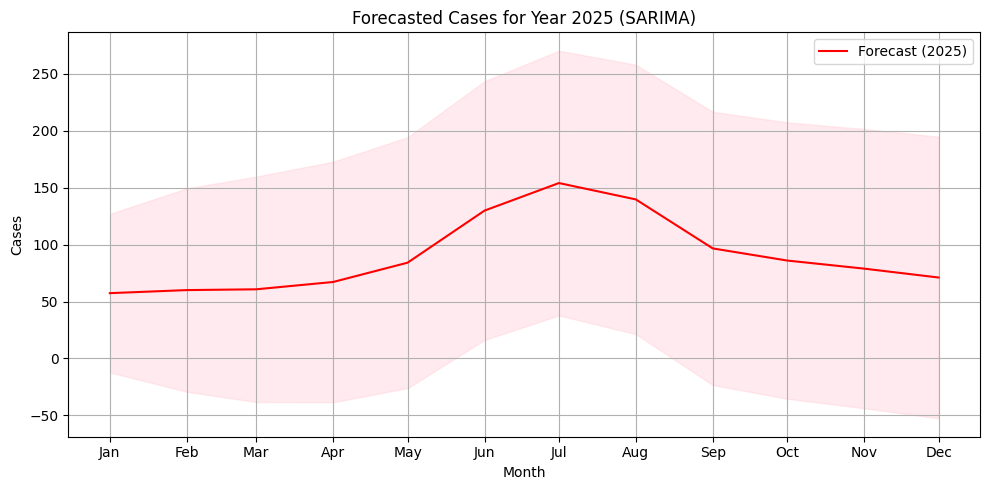

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ‡∏™‡∏£‡πâ‡∏≤‡∏á datetime
df['ds'] = pd.to_datetime(df[['‡∏õ‡∏µ', '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô']].rename(columns={'‡∏õ‡∏µ': 'year', '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô': 'month'}).assign(day=1))

# ‡∏£‡∏ß‡∏°‡∏¢‡∏≠‡∏î cases ‡∏ï‡πà‡∏≠‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
monthly_cases = df.groupby('ds')['cases'].sum().asfreq('MS')

# ‡πÅ‡∏ö‡πà‡∏á train
train = monthly_cases[:'2024-12']

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• SARIMA
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• SARIMA
results.save('sarima_model.pkl')
print("SARIMA model saved as 'sarima_model.pkl'")

# ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå 24 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
forecast = results.get_forecast(steps=24)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏õ‡∏µ 2025
pred_2025 = predicted_mean['2025-01':'2025-12']
conf_2025 = conf_int.loc['2025-01':'2025-12']

# Plot ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏õ‡∏µ 2025
plt.figure(figsize=(10, 5))
plt.plot(pred_2025.index, pred_2025, label='Forecast (2025)', color='red')
plt.fill_between(pred_2025.index,
                 conf_2025.iloc[:, 0],
                 conf_2025.iloc[:, 1], color='pink', alpha=0.3)

# ‡∏ï‡∏Å‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Forecasted Cases for Year 2025 (SARIMA)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(pred_2025.index, [d.strftime('%b') for d in pred_2025.index])  # ‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÅ‡∏ö‡∏ö Jan, Feb, ...
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ß‡πâ
results = SARIMAXResults.load('sarima_model.pkl')

# ‡πÉ‡∏ä‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢
forecast = results.get_forecast(steps=12)
print(forecast.predicted_mean)


2025-01-01     57.356048
2025-02-01     60.040841
2025-03-01     60.735230
2025-04-01     67.167764
2025-05-01     84.127711
2025-06-01    129.872085
2025-07-01    154.083446
2025-08-01    139.698726
2025-09-01     96.652722
2025-10-01     86.003350
2025-11-01     78.895129
2025-12-01     71.092921
Freq: MS, Name: predicted_mean, dtype: float64


In [9]:
df_final_clean_encoded.corr()['cases']

cases            1.000000
temp_15d_avg     0.100030
rain_15d_avg     0.094145
humid_15d_avg    0.018460
‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)        -0.034136
‡πÄ‡∏û‡∏®              0.007874
‡∏≠‡∏≤‡∏ä‡∏µ‡∏û            0.088724
‡∏ï‡∏≥‡∏ö‡∏•             0.051749
‡∏≠‡∏≥‡πÄ‡∏†‡∏≠            0.042857
‡πÄ‡∏î‡∏∑‡∏≠‡∏ô           -0.005328
‡∏õ‡∏µ               0.229528
‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™           0.013666
‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•          -0.147233
Name: cases, dtype: float64

‚úÖ RMSE: 0.39
‚úÖ R¬≤: 0.986


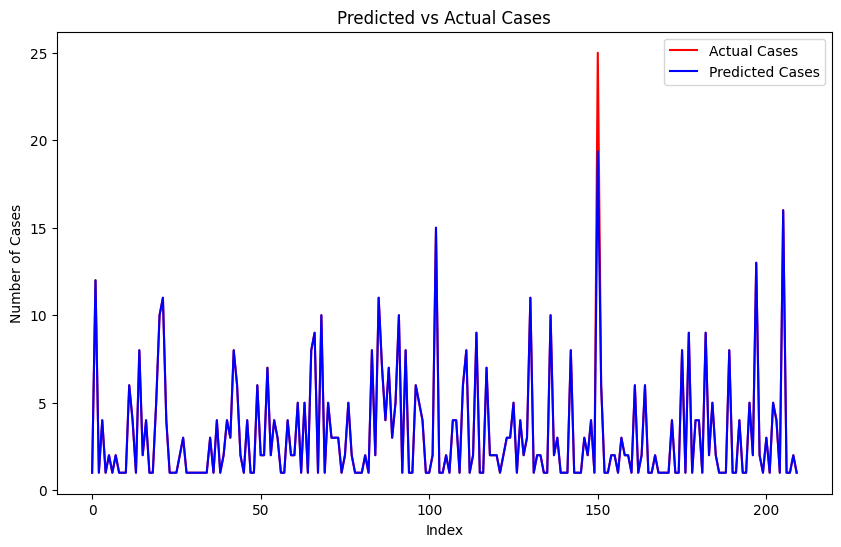

In [29]:

# ‚úÖ 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 5. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
gb_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = gb_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"‚úÖ RMSE: {rmse:.2f}")
print(f"‚úÖ R¬≤: {r2:.3f}")

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases', color='blue')
plt.title('Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [10]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# ------------------ ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ------------------
df = pd.read_excel("df_final_clean.xlsx")

# ‡∏•‡∏ö‡∏ä‡πà‡∏≠‡∏á‡∏ß‡πà‡∏≤‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå
df.columns = df.columns.str.strip()

# ‡πÅ‡∏õ‡∏•‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# ------------------ ‡∏™‡∏£‡πâ‡∏≤‡∏á lag features ------------------
# cases[t-1], cases[t-2], cases[t-3]
df['lag1'] = df['cases'].shift(1)
df['lag2'] = df['cases'].shift(2)
df['lag3'] = df['cases'].shift(3)

# rolling average
df['roll3'] = df['cases'].shift(1).rolling(3).mean()
df['roll6'] = df['cases'].shift(1).rolling(6).mean()

# ------------------ season feature ------------------
def month_to_season(m):
    if m in [3,4,5]:
        return "‡∏£‡πâ‡∏≠‡∏ô"
    elif m in [6,7,8,9]:
        return "‡∏ù‡∏ô"
    else:
        return "‡∏´‡∏ô‡∏≤‡∏ß"

df['season'] = df['month'].apply(month_to_season)

# ------------------ ‡∏•‡∏ö missing ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift ------------------
df = df.dropna()

# ------------------ Feature / Target ------------------
features = ['lag1','lag2','lag3','roll3','roll6','month','year']
X = df[features]
y = df['cases']

# ------------------ Train/Test split ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=12)

# ------------------ Train XGBoost ------------------
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# ------------------ Evaluate ------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# ------------------ Save Model ------------------
joblib.dump(model, "xgb_forecast_model.pkl")
print("‚úÖ XGBoost forecast model saved as xgb_forecast_model.pkl")

# ------------------ ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ ------------------
latest = df.iloc[-1]   # ‡πÅ‡∏ñ‡∏ß‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î
next_input = pd.DataFrame([{
    "lag1": latest['cases'],
    "lag2": df.iloc[-2]['cases'],
    "lag3": df.iloc[-3]['cases'],
    "roll3": df['cases'].iloc[-3:].mean(),
    "roll6": df['cases'].iloc[-6:].mean(),
    "month": (latest['month'] % 12) + 1,
    "year": latest['year'] + (1 if latest['month']==12 else 0)
}])

next_pred = model.predict(next_input)[0]
print(f"üìå ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ ({int(next_input['year'])}-{int(next_input['month']):02d}) = {int(round(next_pred))} ‡∏Ñ‡∏ô")


RMSE: 2.4392771966686158
‚úÖ XGBoost forecast model saved as xgb_forecast_model.pkl
üìå ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ (2025-01) = 1 ‡∏Ñ‡∏ô


C:\Users\USER\AppData\Local\Temp\ipykernel_5540\3983374011.py:84: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"üìå ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ ({int(next_input['year'])}-{int(next_input['month']):02d}) = {int(round(next_pred))} ‡∏Ñ‡∏ô")


‚úÖ XGBoost RMSE: 0.08
‚úÖ XGBoost R¬≤: 0.999
‚úÖ XGBoost MAE: 0.01


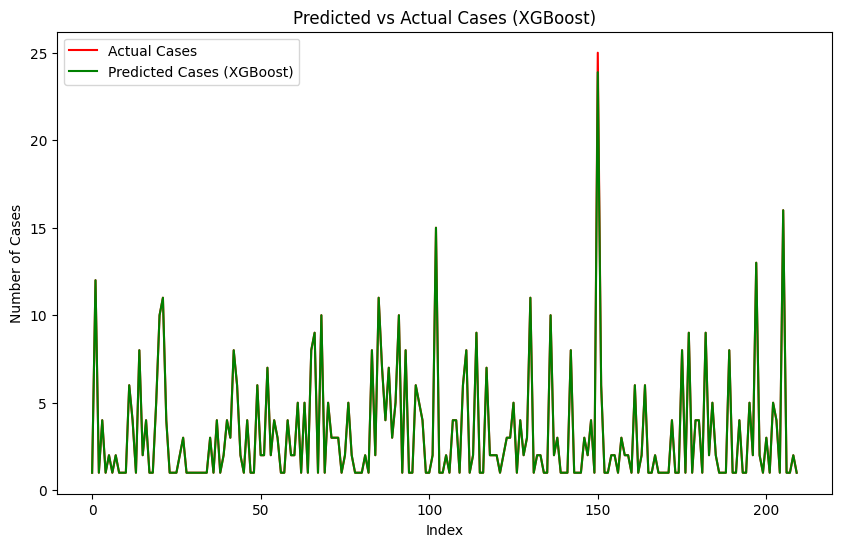

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ‚úÖ 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 5. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
xgb_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MAE

print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")
print(f"‚úÖ XGBoost MAE: {mae:.2f}")  # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• MAE

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [32]:
X

cases  temp_15d_avg  rain_15d_avg  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠    ‡∏õ‡∏µ  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•
0         1     22.745000      0.000000      0     8      1  2017       2
1         1     27.170000      2.386667     10    60      8  2017       1
2         1     27.786667      2.520000      0    60      8  2017       1
3         1     27.970000      4.253333     10    60      8  2017       1
4         2     28.501333      4.233333      9    60      8  2017       1
...     ...           ...           ...    ...   ...    ...   ...     ...
1045      2     22.858571      2.071429      6     3      2  2024       2
1046      2     22.716667      1.933333      7    31      2  2024       2
1047      1     21.687333      1.933333     10    15      2  2024       2
1048      1     21.304667      1.933333      7    35      6  2024       2
1049      1     21.056000      1.933333      7    15      2  2024       2

[1050 rows x 8 columns]

In [33]:
import joblib

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ù‡∏∂‡∏Å‡πÄ‡∏™‡∏£‡πá‡∏à‡πÅ‡∏•‡πâ‡∏ß
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

üîé Overfitting Check
Train RMSE: 0.00
Train R¬≤: 1.000
Test  RMSE: 0.08
Test  R¬≤: 0.999


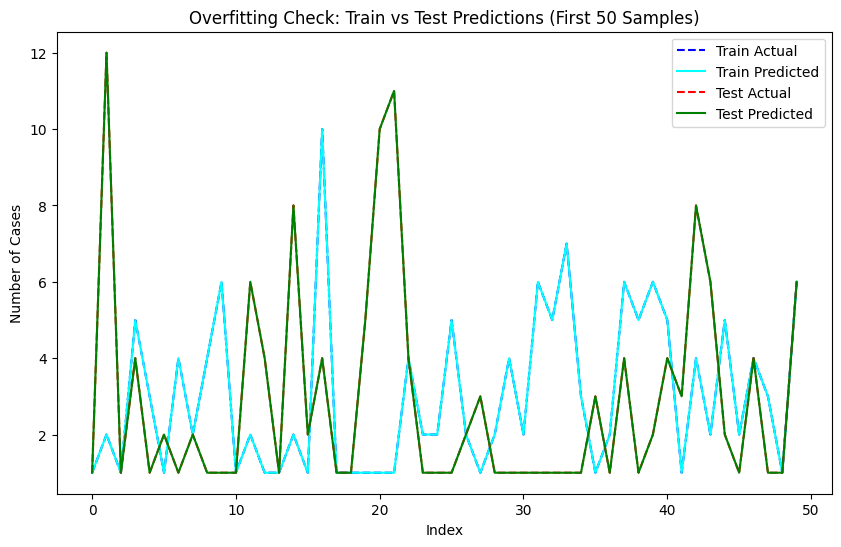

In [21]:
# ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• Train set
y_train_pred = xgb_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("üîé Overfitting Check")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R¬≤: {r2_train:.3f}")
print(f"Test  RMSE: {rmse:.2f}")
print(f"Test  R¬≤: {r2:.3f}")

# ‚úÖ ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö Train vs Test
plt.figure(figsize=(10,6))
plt.plot(y_train.values[:50], label='Train Actual', color='blue', linestyle='--')
plt.plot(y_train_pred[:50], label='Train Predicted', color='cyan')
plt.plot(y_test.values[:50], label='Test Actual', color='red', linestyle='--')
plt.plot(y_pred[:50], label='Test Predicted', color='green')
plt.title('Overfitting Check: Train vs Test Predictions (First 50 Samples)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


‚úÖ XGBoost RMSE: 0.08
‚úÖ XGBoost R¬≤: 0.999
üìä Cross-validated R¬≤ (mean): 0.997
üìä Cross-validated R¬≤ (std): 0.004


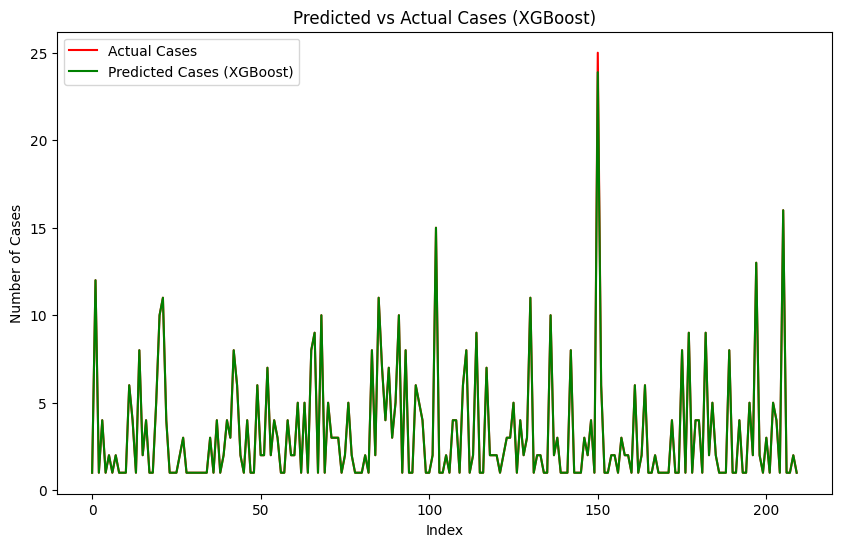

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ‚úÖ 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y (‡∏ï‡∏±‡∏î‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏≠‡∏≠‡∏Å)
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 2. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test (‡πÉ‡∏´‡∏°‡πà)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ‚úÖ 4. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 5. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")

# ‚úÖ 6. ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Cross-validation R¬≤
cv_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"üìä Cross-validated R¬≤ (mean): {cv_r2_scores.mean():.3f}")
print(f"üìä Cross-validated R¬≤ (std): {cv_r2_scores.std():.3f}")

# ‚úÖ 7. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


‚úÖ Random Forest RMSE: 0.39
‚úÖ Random Forest R¬≤: 0.986


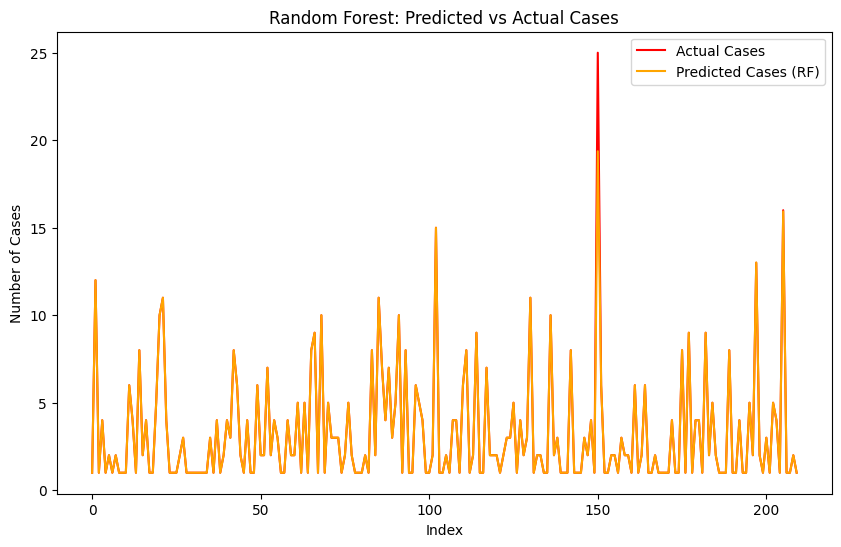

In [23]:
from sklearn.ensemble import RandomForestRegressor
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
rf_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = rf_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"‚úÖ Random Forest RMSE: {rmse:.2f}")
print(f"‚úÖ Random Forest R¬≤: {r2:.3f}")

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (RF)', color='orange')
plt.title('Random Forest: Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


üìä Comparison of Models (RMSE & MAE):
               Model  RMSE   MAE
0  Gradient Boosting  0.39  0.03
1            XGBoost  0.08  0.01
2      Random Forest  0.39  0.03
3      Deep Learning  0.13  0.10


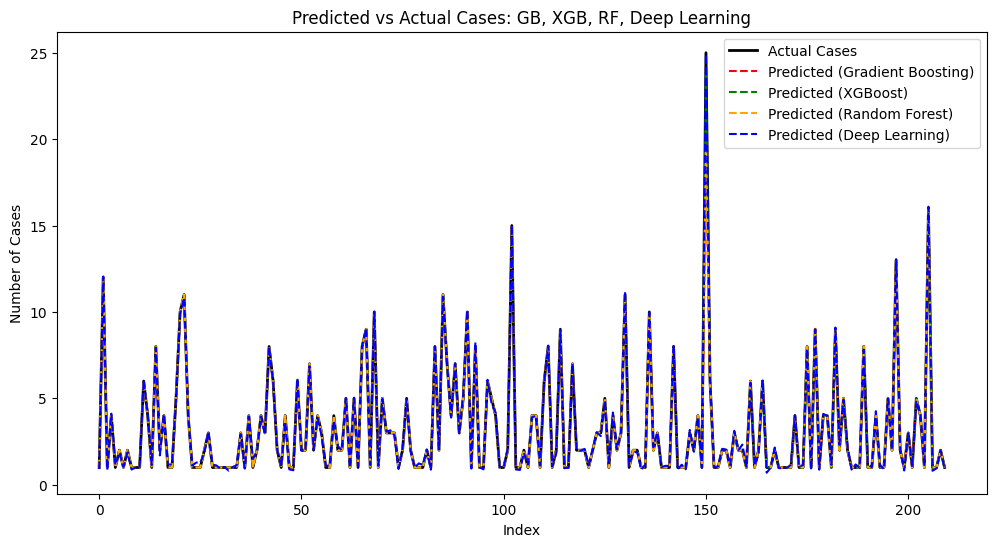

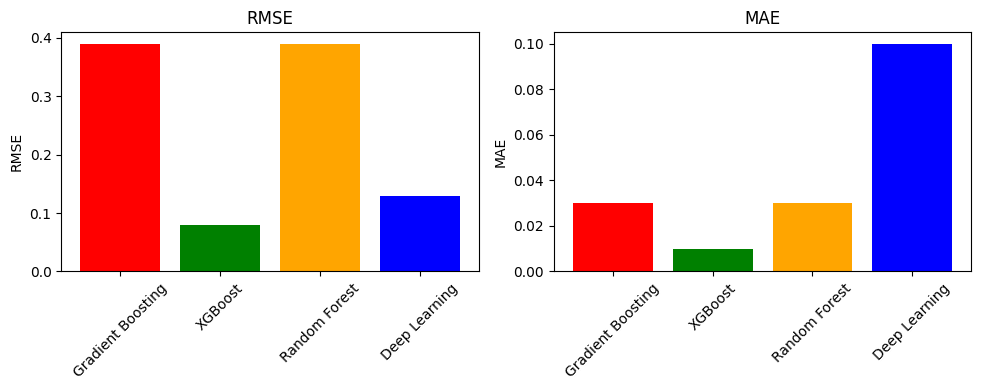

In [24]:
# ==========================
# 0. Import Libraries
# ==========================
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================
# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
# ==========================
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ==========================
# 2. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 3. Standardize ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Deep Learning
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Gradient Boosting
# ==========================
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ==========================
# 5. ‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ==========================
# 6. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 7. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Deep Learning (MLP)
# ==========================
dl_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                        max_iter=500, random_state=42)
dl_model.fit(X_train_scaled, y_train)
y_pred_dl = dl_model.predict(X_test_scaled)

# ==========================
# 8. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• RMSE & MAE
# ==========================
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Deep Learning']
preds = [y_pred_gb, y_pred_xgb, y_pred_rf, y_pred_dl]

metrics = []
for name, y_pred in zip(models, preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append({'Model': name, 'RMSE': round(rmse,2), 'MAE': round(mae,2)})

metrics_df = pd.DataFrame(metrics)
print("üìä Comparison of Models (RMSE & MAE):")
print(metrics_df)

# ==========================
# 9. ‡∏Å‡∏£‡∏≤‡∏ü Actual vs Predicted
# ==========================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Cases', color='black', linewidth=2)
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red', linestyle='--')
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='orange', linestyle='--')
plt.plot(y_pred_dl, label='Predicted (Deep Learning)', color='blue', linestyle='--')
plt.title('Predicted vs Actual Cases: GB, XGB, RF, Deep Learning')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ==========================
# 10. Bar chart RMSE & MAE
# ==========================
plt.figure(figsize=(10,4))
metrics_list = ['RMSE','MAE']
colors = ['red','green','orange','blue']

for i, metric in enumerate(metrics_list):
    plt.subplot(1,2,i+1)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
import joblib

model = joblib.load('xgb_model.pkl')
print(model.feature_names_in_)


['cases' 'temp_15d_avg' 'rain_15d_avg' '‡∏≠‡∏≤‡∏ä‡∏µ‡∏û' '‡∏ï‡∏≥‡∏ö‡∏•' '‡∏≠‡∏≥‡πÄ‡∏†‡∏≠' '‡∏õ‡∏µ'
 '‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•']
